In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, svm, linear_model, neighbors, tree, ensemble
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from matplotlib.colors import ListedColormap

In [5]:
# load the date and visualize
df = pd.read_csv('input3.csv', header=0, names=['x1', 'x2', 'value'], sep=',', error_bad_lines=False)
df['color'] = np.where(df['value'] == 1, 'blue', 'red')


In [6]:
# play aroud with iris dataset
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

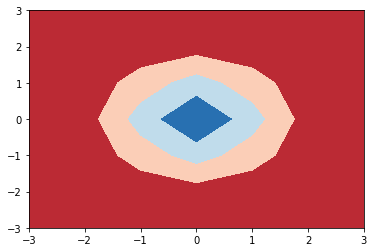

In [45]:
# try plotting contours (stolen, https://matplotlib.org/examples/pylab_examples/contourf_demo.html)
origin = 'lower'
#origin = 'upper'

delta = 1

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
#Z = 10000 * (Z1 - Z2)

Z = np.ma.array(Z1 * 1000)
# mask a circle in the middle:
#interior = np.sqrt((X**2) + (Y**2)) < 0.5
#Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 4,
                  cmap='RdBu',
                  origin=origin)

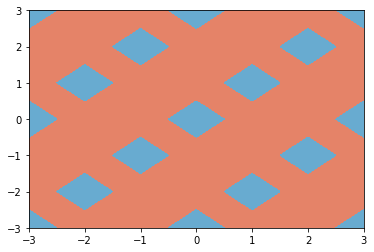

In [8]:
# try and make our own contour plot
origin = 'lower'
delta = 1

def checkerboard(x, y):
    mod = 3
    if (x % 3) == (y % 3):
        return 1
    else:
        return 0

def checkerboard2(x, y):
    if (y % 2 == 0):
        return 1
    
    return 0

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros((len(X), len(X[0])))

# create our own "faux" function
for x in range(len(X)):
    for y in range(len(X[x])):
        Z[x][y] = checkerboard(x, y)

CS = plt.contourf(X, Y, Z, 1,
                  cmap='RdBu',
                  origin=origin)

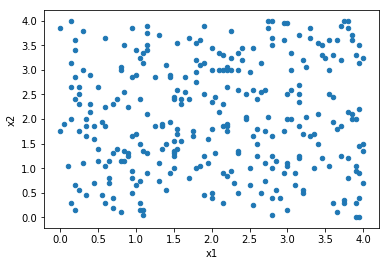

In [46]:
# get back to the project
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['value'], test_size=0.4, random_state=0, stratify=df['value'])
X1, X2 = np.meshgrid(X_train['x1'], X_train['x2'])
ax = X_train.plot(kind='scatter', x='x1', y='x2')
X, Y = np.meshgrid(X_train['x1'], X_train['x2'])
Z = np.zeros((len(X), len(X[0])))

In [31]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#helpers for plotting
def plot(clf):
    Z = clf.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.figure()
    plt.pcolormesh(X, Y, Z, cmap=cmap_light)
    plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap=cmap_bold)

In [47]:
# try our first SVM
#clf = svm.SVC(kernel='linear', C=.5)
parameters = {'kernel':['linear'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00203371,  0.0016161 ,  0.00300508,  0.00371451,  0.00332208,
         0.01343732,  0.3381752 ]),
 'mean_score_time': array([ 0.00057645,  0.00044641,  0.00083752,  0.00118203,  0.00070925,
         0.00051565,  0.00064926]),
 'mean_test_score': array([ 0.59,  0.59,  0.59,  0.59,  0.59,  0.59,  0.59]),
 'mean_train_score': array([ 0.59000124,  0.59000124,  0.59000124,  0.59000124,  0.59000124,
         0.59000124,  0.59000124]),
 'param_C': masked_array(data = [0.1 0.5 1 5 10 50 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'linear' 'linear' 'linear' 'linear' 'linear' 'linear'],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.1, 'kernel': 'linear'},
  {'C': 0.5, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 5, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 50, 'kernel': 

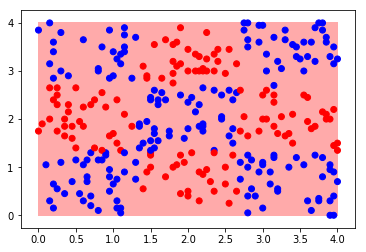

In [48]:
plot(clf)

In [49]:
# SVM with Polynomial Kernel
parameters = {'kernel':['poly'], 'C':[0.1, 1, 3], 'degree':[4,5,6], 'gamma':[0.1,0.5]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([  4.48544820e-03,   2.86347071e-02,   3.74937057e-03,
          9.72995758e-02,   3.04619471e-03,   5.38348277e-01,
          4.04357910e-03,   8.93083413e-02,   2.46723493e-03,
          3.92363628e-01,   2.61330605e-03,   3.36374847e+00,
          4.68722979e-03,   2.01382796e-01,   3.53050232e-03,
          1.17078694e+00,   3.47383817e-03,   5.37647311e+00]),
 'mean_score_time': array([ 0.00095693,  0.00094557,  0.00091839,  0.0009168 ,  0.00078154,
         0.00072606,  0.00049877,  0.00070119,  0.00050505,  0.0007209 ,
         0.00048248,  0.00071716,  0.00049146,  0.00072893,  0.00047986,
         0.00074903,  0.00050076,  0.00071104]),
 'mean_test_score': array([ 0.59      ,  0.62333333,  0.59      ,  0.68      ,  0.59      ,
         0.7       ,  0.59      ,  0.67333333,  0.60333333,  0.67666667,
         0.61333333,  0.67666667,  0.59      ,  0.65666667,  0.61333333,
         0.68333333,  0.63666667,  0.67666667]),
 'mean_train_score': array([ 0.59  

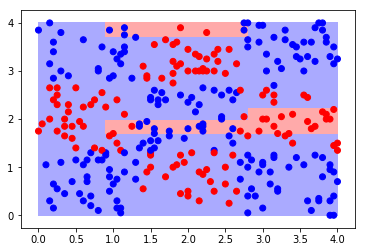

In [50]:
plot(clf)

In [51]:
# hopefully rbf is better
parameters = {'kernel':['rbf'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100], 'gamma':[0.1, 0.5, 1, 3, 6, 10]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00316389,  0.00229136,  0.00403269,  0.00259852,  0.00360958,
         0.0023152 ,  0.0023001 ,  0.00210555,  0.00191967,  0.00185219,
         0.00211485,  0.00228024,  0.00221896,  0.00204611,  0.00186491,
         0.00181373,  0.00209157,  0.00245794,  0.00218678,  0.00186658,
         0.00157682,  0.00164763,  0.00195607,  0.00238522,  0.00232538,
         0.00184401,  0.00164119,  0.00166829,  0.00192746,  0.00257762,
         0.00285753,  0.00187564,  0.00171423,  0.00167219,  0.00194915,
         0.00242901,  0.00324305,  0.00207917,  0.0017546 ,  0.0021414 ,
         0.00195003,  0.00242416]),
 'mean_score_time': array([ 0.00104523,  0.00085417,  0.00130479,  0.0009733 ,  0.00257301,
         0.00082954,  0.00076008,  0.00073512,  0.00065668,  0.000633  ,
         0.00069149,  0.00073282,  0.00080379,  0.00069173,  0.00060399,
         0.00055687,  0.00067655,  0.00079942,  0.00077796,  0.00059748,
         0.00048478,  0.00049146,  0.00058866,  0.00

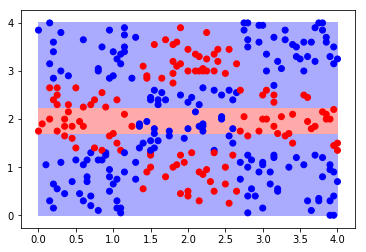

In [52]:
plot(clf)

In [53]:
# hopefully rbf is better
parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
logr = linear_model.LogisticRegression()
clf = GridSearchCV(logr, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.0015196 ,  0.00134611,  0.00107908,  0.00110197,  0.00155067,
         0.00211159,  0.00212049]),
 'mean_score_time': array([ 0.00040078,  0.00035826,  0.00027776,  0.0003113 ,  0.00045784,
         0.0006574 ,  0.0005184 ]),
 'mean_test_score': array([ 0.58333333,  0.58      ,  0.58      ,  0.58      ,  0.58      ,
         0.58      ,  0.58      ]),
 'mean_train_score': array([ 0.58166667,  0.58      ,  0.58      ,  0.58333333,  0.58333333,
         0.58333333,  0.58333333]),
 'param_C': masked_array(data = [0.1 0.5 1 5 10 50 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 50},
  {'C': 100}),
 'rank_test_score': array([1, 2, 2, 2, 2, 2, 2], dtype=int32),
 'split0_test_score': array([ 0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58]),
 'split0_train_score': array([ 0.57 ,  0.57 ,  0.57 ,  0.575,  0.575,  0.575,  0.575]),
 'split

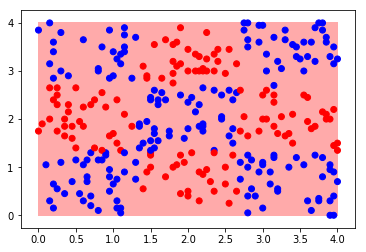

In [54]:
plot(clf)

In [55]:
# hopefully k-nearest neighbors is better
parameters = {'n_neighbors': range(1, 51), 'leaf_size': range(5, 61, 5)}
knn = neighbors.KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00129954,  0.00116515,  0.00099214,  0.00164604,  0.00151833,
         0.00118009,  0.00226275,  0.00117747,  0.00127316,  0.00101813,
         0.00097982,  0.00093357,  0.0009261 ,  0.00098181,  0.00097887,
         0.000928  ,  0.00103919,  0.0010403 ,  0.00105619,  0.0010047 ,
         0.00095431,  0.00095614,  0.0009923 ,  0.00097044,  0.00099301,
         0.00096432,  0.0009466 ,  0.00104221,  0.001079  ,  0.00096289,
         0.00095963,  0.00096957,  0.00094644,  0.00094811,  0.00096758,
         0.00106009,  0.00100652,  0.00101407,  0.00098284,  0.00100311,
         0.00106104,  0.00159987,  0.00148257,  0.00235454,  0.00094   ,
         0.00094358,  0.00093762,  0.00092498,  0.00097585,  0.00091465,
         0.00091203,  0.00092959,  0.00091362,  0.00089312,  0.00088914,
         0.00107098,  0.00227729,  0.00092498,  0.00089685,  0.00094946,
         0.00096202,  0.00104753,  0.00093428,  0.00094851,  0.00092014,
         0.00095169,  0.00093834, 

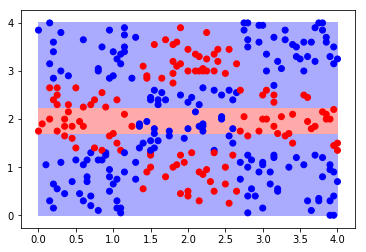

In [56]:
plot(clf)

In [57]:
# Decision Trees
parameters = {'max_depth': range(1, 51), 'min_samples_split': range(2, 11)}
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00129414,  0.00127188,  0.00090377,  0.0008661 ,  0.00094827,
         0.00168737,  0.00207305,  0.00137607,  0.00154336,  0.00420976,
         0.00136447,  0.00180141,  0.00148638,  0.00096869,  0.00089582,
         0.00084273,  0.00098864,  0.00085457,  0.00086435,  0.00086451,
         0.00090845,  0.00090384,  0.00087611,  0.00093349,  0.00091894,
         0.00104427,  0.00088398,  0.00087849,  0.00090806,  0.00098912,
         0.00093555,  0.00094676,  0.00089931,  0.00092324,  0.00092928,
         0.00092427,  0.00090591,  0.00105993,  0.00099182,  0.00095177,
         0.00099166,  0.00096925,  0.00093532,  0.00093977,  0.00091314,
         0.00095344,  0.00096504,  0.00089955,  0.00091553,  0.00091187,
         0.00102385,  0.00090241,  0.00106827,  0.00093412,  0.0009373 ,
         0.00101463,  0.00099468,  0.00100454,  0.00096234,  0.00092737,
         0.00090718,  0.00092244,  0.00097926,  0.00099516,  0.00112263,
         0.00094994,  0.00094231, 

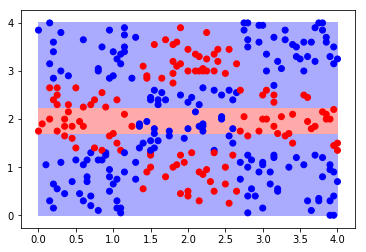

In [58]:
plot(clf)

In [59]:
# Random Forests
parameters = {'max_depth': range(1, 51), 'min_samples_split': range(2, 11)}
rf = ensemble.RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.01801157,  0.01881854,  0.01638365,  0.01664861,  0.0167799 ,
         0.01690777,  0.01663494,  0.01643054,  0.01661261,  0.01692971,
         0.01701307,  0.0108664 ,  0.01357675,  0.01308235,  0.00976698,
         0.00996653,  0.00973439,  0.01285942,  0.00979447,  0.00979662,
         0.00982356,  0.00984708,  0.00981593,  0.00981975,  0.00994984,
         0.00992163,  0.0098091 ,  0.01011292,  0.00991837,  0.01019756,
         0.01012723,  0.01026464,  0.01049097,  0.01039608,  0.01010839,
         0.01025311,  0.01004775,  0.01082166,  0.01033791,  0.01032281,
         0.01053842,  0.01034188,  0.01020575,  0.01041285,  0.01051458,
         0.01451953,  0.01208695,  0.01005284,  0.0100828 ,  0.01006007,
         0.01005427,  0.01015902,  0.01002971,  0.00993482,  0.01014717,
         0.01016553,  0.01010704,  0.01015655,  0.01006166,  0.01020726,
         0.01009758,  0.01006405,  0.01002002,  0.01022832,  0.01009703,
         0.01024405,  0.01018111, 

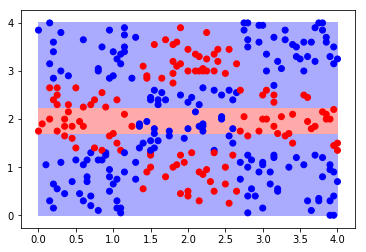

In [60]:
plot(clf)